In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=True')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


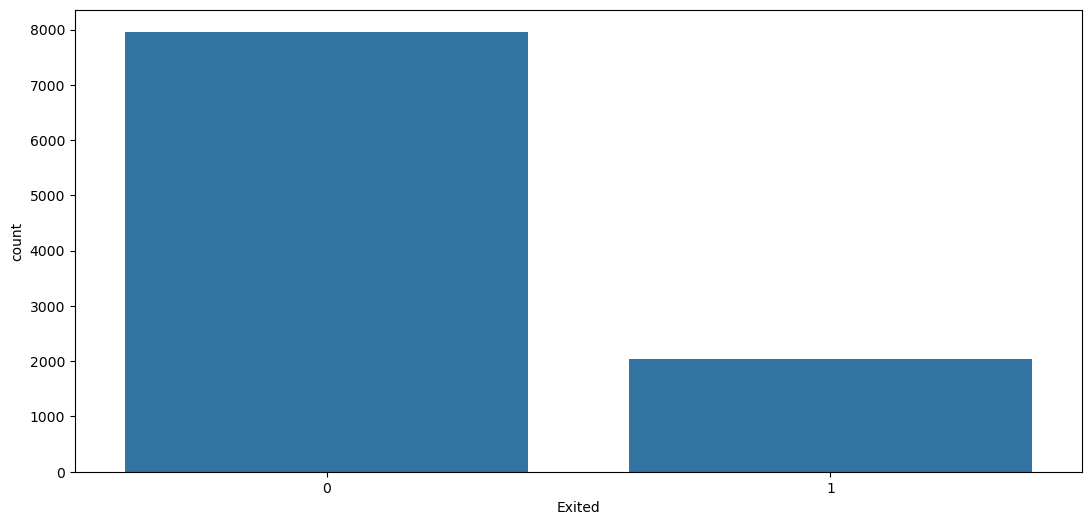

In [5]:
plt.figure(figsize=(13,6))
sns.countplot(data=bank_data,x='Exited')
plt.show()

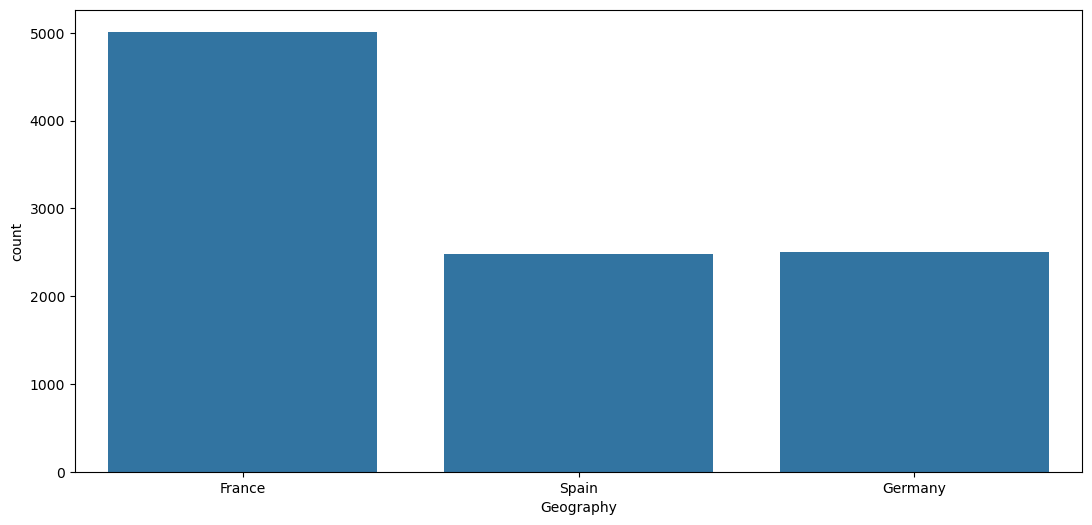

In [6]:
plt.figure(figsize=(13,6))
sns.countplot(data=bank_data,x='Geography')
plt.show()

In [7]:
bank_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

In [10]:
one_hot.fit(bank_data[['Geography']])

OneHotEncoder()

In [11]:
temp_arr = one_hot.transform(bank_data[['Geography']]).toarray()

In [12]:
one_hot.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [13]:
# convert into dataframe
temp = pd.DataFrame(temp_arr,columns=['France','Germany','Spain'],dtype='int')

In [14]:
temp.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [15]:
bank_data = pd.concat([bank_data,temp],axis=1)

In [16]:
bank_data.drop('Geography',axis=1,inplace=True)

In [17]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
bank_data['Gender']=bank_data['Gender'].map({'Male':0,'Female':1})

In [19]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [20]:
X = bank_data.drop('Exited',axis=1)
Y = bank_data['Exited']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [22]:
from sklearn.svm import SVC

svc_model = SVC()

In [23]:
svc_model.fit(X_train,Y_train)

SVC()

In [24]:
predictions = svc_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

print (classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.39      0.44      2000
weighted avg       1.00      0.79      0.88      2000



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print (confusion_matrix(predictions,Y_test))

[[1577  423]
 [   0    0]]


In [33]:
p = {
    'C':[0.02,0.2,2,10],
    'gamma':[12,1,0.1,0.01]
}

In [34]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(SVC(),p,verbose=2)

In [35]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................................C=0.02, gamma=12; total time=  32.7s
[CV] END ...................................C=0.02, gamma=12; total time=  37.2s
[CV] END ...................................C=0.02, gamma=12; total time=  36.6s
[CV] END ...................................C=0.02, gamma=12; total time=  37.5s
[CV] END ...................................C=0.02, gamma=12; total time=  28.3s
[CV] END ....................................C=0.02, gamma=1; total time=  26.8s
[CV] END ....................................C=0.02, gamma=1; total time=  29.3s
[CV] END ....................................C=0.02, gamma=1; total time=  24.3s
[CV] END ....................................C=0.02, gamma=1; total time=  23.4s
[CV] END ....................................C=0.02, gamma=1; total time=  23.8s
[CV] END ..................................C=0.02, gamma=0.1; total time=  15.8s
[CV] END ..................................C=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.02, 0.2, 2, 10], 'gamma': [12, 1, 0.1, 0.01]},
             verbose=2)

In [36]:
grid_model.best_params_

{'C': 0.02, 'gamma': 12}

In [37]:
grid_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)